# Machine Learning 

Now we shall proceed to machine learning part of our project.

---

### Essential Libraries 
Let us begin by importing the essential Python Libraries.


In [1]:
#Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from matplotlib.pyplot import figure

---

### Importing Data

In [2]:
#import our dataframe to perform machine learning
df = pd.read_csv("finalized_data")
df.set_index("Country Name", inplace = True)

Since we want to predict HALE and LE from other predictors and compare their performances, we will create two dataframes; one for each. 

Note that HALE and LE are dependent on each other, so in order to improve the accuracy of our models, we will remove HALE column in LE dataframe and vice versa. 

In [3]:
#HALE dataframe 
HALE_df = df.copy()
del HALE_df['Life expectancy at birth, total (years)'] #remove LE column

#LE dataframe
LE_df = df.copy()
del LE_df['HALE'] #remove HALE column


---

### Creating Train-Test split

Now for each of our dataframes, we will split it into train and test splits for our machine learning models. 

In [4]:
#For HALE dataset
HALE_X = HALE_df.loc[: , HALE_df.columns != 'HALE'] #all variables except HALE are predictors
HALE_y = HALE_df['HALE'] #HALE is the response variable


#For LE dataset
LE_X = LE_df.loc[: , LE_df.columns != 'Life expectancy at birth, total (years)'] #all variables except LE are predictors
LE_y = LE_df['Life expectancy at birth, total (years)'] #LE is the response variable

In [5]:
from sklearn.model_selection import train_test_split
#train test splits for x and y for HALE
X_train_hale, X_test_hale, y_train_hale, y_test_hale = train_test_split(HALE_X, HALE_y, test_size = 0.2, shuffle=True)


#train test splits for x and y for LE
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(LE_X, LE_y, test_size = 0.2, shuffle=True)

---
# Model Training 


First we will define some useful utility functions to aid our models.

In [6]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values
    :param actual: actual dataset
    :param predicted: predicted dataset
    :returns: MSE'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [7]:
def pred_HALE(country, model):
    '''
    predicts the health-adjusted life expectancy (HALE) for a country from 2000-2019, and plots a graph of predicted HALE against actual HALE.
    :param country: name of the country
    :param model: the model used
    '''
    idx = list(HALE_df.index).index(country + ' - 2000')
    country_data = HALE_df.iloc[idx:idx+20]

    y_pred = pd.DataFrame(country_data["HALE"]) #response variable
    x_pred = pd.DataFrame(country_data[country_data.columns[country_data.columns != 'HALE']]) #predicting variables 

    country_preds = model.predict(x_pred)

    # plot predicted against actual
    year = [x for x in range(2000,2020)]
    figure(figsize=(16, 6), dpi=80)
    plt.plot(year, country_preds, label = "Predicted HALE", color='blue')
    plt.plot(year, y_pred, label = "Actual HALE", color='green')
    plt.xticks(year)
    plt.ylabel("Years")
    plt.title("Predicted versus Actual HALE for " + country, fontweight="bold")
    plt.legend()
    plt.show()

In [8]:
def pred_LE(country, model):
    '''
    predicts the health-adjusted life expectancy (HALE) for a country from 2000-2019, and plots a graph of predicted LE against actual LE.
    :param country: name of the country
    :param model: the model used
    '''
    idx = list(LE_df.index).index(country + ' - 2000')
    country_data = LE_df.iloc[idx:idx+20]

    y_pred = pd.DataFrame(country_data["Life expectancy at birth, total (years)"]) #response variable
    x_pred = pd.DataFrame(country_data[country_data.columns[country_data.columns != 'Life expectancy at birth, total (years)']]) #predicting variables 

    country_preds = model.predict(x_pred)
    # plot predicted against actual
    year = [x for x in range(2000,2020)]
    figure(figsize=(16, 6), dpi=80)
    plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
    plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
    plt.xticks(year)
    plt.ylabel("Years")
    plt.title("Predicted versus Actual Life Expectancy for " + country, fontweight="bold")
    plt.legend()
    plt.show()

---
## Multivariate Linear Regression 

We will start off by using a simple linear regression model to get a feel of how our datasets perform in a model.

In [9]:
from sklearn.linear_model import LinearRegression


Intercept 	: b =  50.5601785794005
Coefficients 	: a =  [ 1.45596673e-01 -2.42552692e-01 -7.68254787e-02  7.01563192e-02
  8.12799108e-03  1.03526265e-04 -6.94164666e-03  5.25175549e-02
  5.18893956e-04  2.25528082e-09]
Explained Variance (R^2) 	: 0.7367910614155262
Mean Squared Error (MSE) 	: 14.52262533520697
Root Mean Squared Error (RMSE) 	: 3.8108562469879352


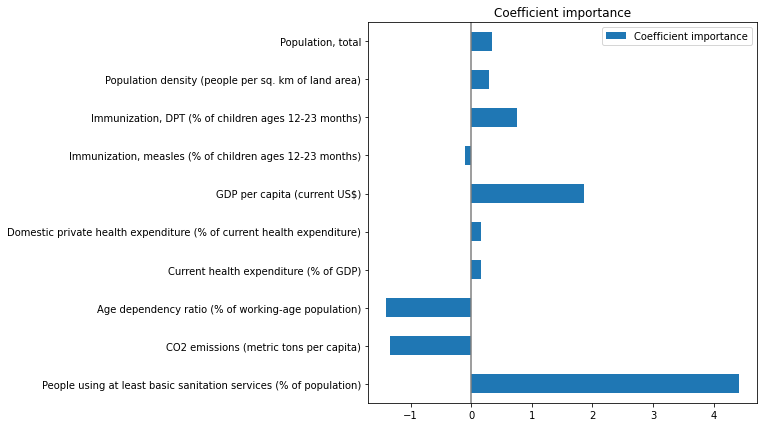

In [10]:
# Create a Linear Regression object to predict HALE
linreg_HALE = LinearRegression()

# train the model on train data
linreg_HALE.fit(X_train_hale, y_train_hale)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg_HALE.intercept_)
print('Coefficients \t: a = ', linreg_HALE.coef_)

# Predict HALE according to test data
preds = linreg_HALE.predict(X_test_hale)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg_HALE.score(X_test_hale, y_test_hale))
mse = mean_sq_err(y_test_hale, preds)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

coefs = pd.DataFrame(
    linreg_HALE.coef_ * X_train_hale.std(axis=0), # multiply by standard deviation to give coeffs same "weightage"
    columns=["Coefficient importance"],
    index=(X_train_hale.columns),
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficient importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Intercept 	: b =  59.94029600015086
Coefficients 	: a =  [ 1.58485417e-01 -2.62437649e-01 -1.19887527e-01  1.60607896e-01
 -2.54771446e-02  1.28658161e-04 -1.75598682e-02  7.95030403e-02
  4.29590778e-04  2.93983526e-09]
Explained Variance (R^2) 	: 0.8032745820627178
Mean Squared Error (MSE) 	: 17.142616418693073
Root Mean Squared Error (RMSE) 	: 4.14036428574746


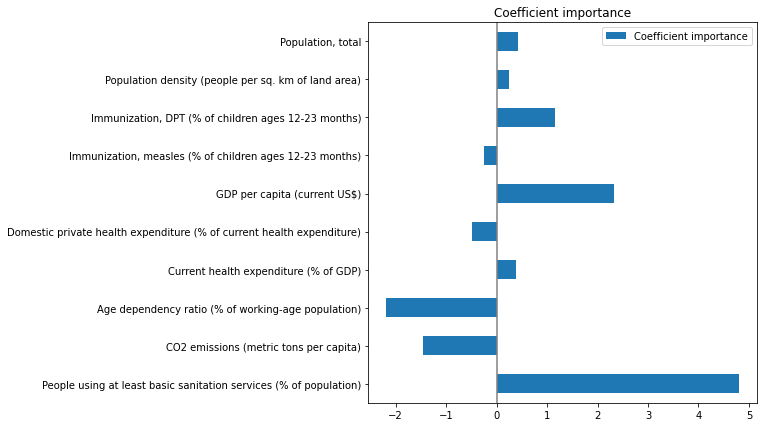

In [11]:
# Create a Linear Regression object to predict LE
linreg_LE = LinearRegression()

# train the model on train data
linreg_LE.fit(X_train_le, y_train_le)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg_LE.intercept_)
print('Coefficients \t: a = ', linreg_LE.coef_)

# Predict LE according to test data
preds = linreg_LE.predict(X_test_le)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg_LE.score(X_test_le, y_test_le))
mse = mean_sq_err(y_test_le, preds)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

coefs = pd.DataFrame(
    linreg_LE.coef_ * X_train_le.std(axis=0), # multiply by standard deviation to give coeffs same "weightage"
    columns=["Coefficient importance"],
    index=(X_train_le.columns),
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficient importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

It is interesting to see that the metrics are ranked similarly in predicting both HALE and life expectancy, with the exception of CO2 emissions and age dependency ratio whose importances have been swapped. However, their magnitudes are slightly different. Particularly, domestic health expenditure previously had a negligible impact in predicting HALE, but has a non-negligible impact in predicting life expectancy.

Let's try to visualise our results for HALE and LE using pred_HALE and pred_LE functions on a sample country. 

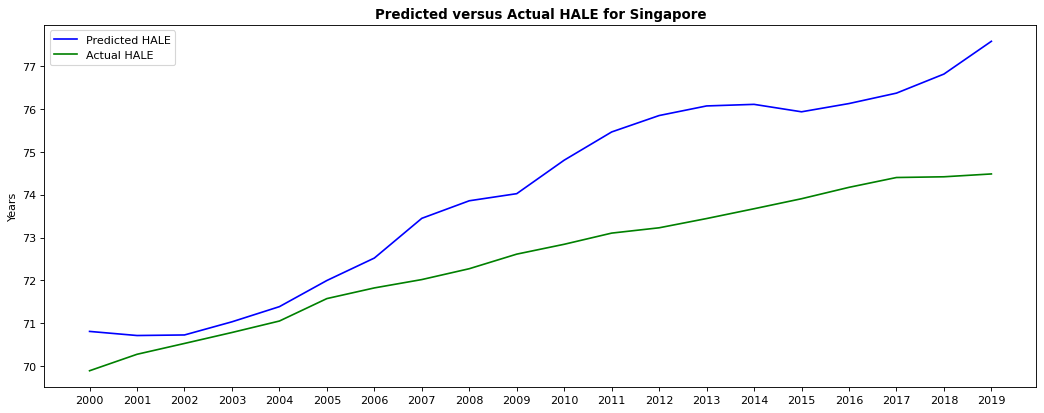

In [12]:
pred_HALE('Singapore', linreg_HALE)

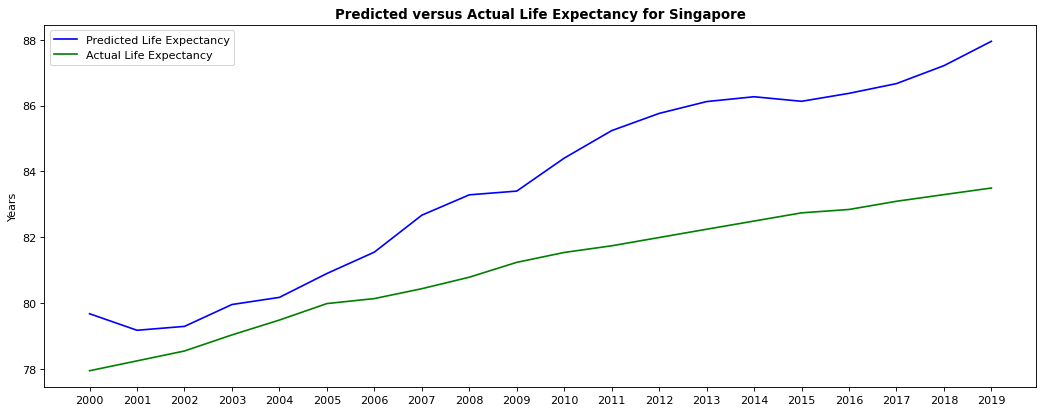

In [13]:
pred_LE("Singapore", linreg_LE)

The model trained to predict HALE seems to perform better than the model trained to predict life expectancy. This could be because the metrics we selected as predictors are better suited to predicting HALE than LE. 

Overall, linear Regression seems to be quite effective for predicting HALE and LE as the R^2 score for each model is relatively decent. 
However, for both models, MSE is rather high, which suggests that the metrics may not be linearly related to HALE and LE. 

Perhaps regression trees could be more efficient in predicting HALE and LE as it is able to better capture nonlinear relationships between variables.

---

## Regression Trees

For our regression tree model, we limit the maximum depth of the tree to 6 and prune leaves that add less than 1% accuracy to the model to prevent overfitting.

In [14]:
from sklearn.tree import DecisionTreeRegressor


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8609398770562573
Mean Squared Error (MSE) 	: 7.672680401511719
Root Mean Squared Error (RMSE) 	: 2.7699603610000847


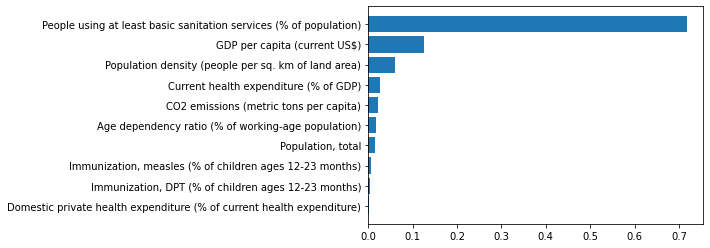

In [15]:
regtree_HALE = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.01, max_depth=6) # reduces overfitting

#regression tree using training data
regtree_HALE.fit(X_train_hale, y_train_hale)

# Predict HALE values in test set using different variables
pred = regtree_HALE.predict(X_test_hale)  
mse = mean_sq_err(y_test_hale, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regtree_HALE.score(X_test_hale, y_test_hale))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

sorted_list = regtree_HALE.feature_importances_.argsort()
plt.barh(X_test_hale.columns[sorted_list], regtree_HALE.feature_importances_[sorted_list])
plt.show()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8739672429372416
Mean Squared Error (MSE) 	: 10.982471066377379
Root Mean Squared Error (RMSE) 	: 3.313981150576656


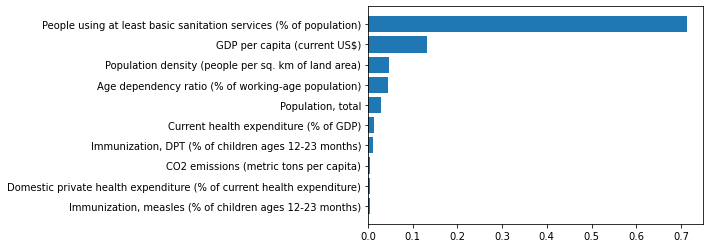

In [16]:
regtree_LE = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.01, max_depth=6) # reduces overfitting

#regression tree using training data
regtree_LE.fit(X_train_le, y_train_le)

# Predict LE values in test set using different variables
pred = regtree_LE.predict(X_test_le)  
mse = mean_sq_err(y_test_le, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regtree_LE.score(X_test_le, y_test_le))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

sorted_list = regtree_LE.feature_importances_.argsort()
plt.barh(X_test_le.columns[sorted_list], regtree_LE.feature_importances_[sorted_list])
plt.show()

As expected, the regression trees perform better than standard linear regression model, now having a R^2 score higher than 0.8.
The MSE and RMSE are also reduced considerably.

It should be noted that the decision tree model leads to lower error overall than the linear regression model for both HALE and life expectancy, implying it is more accurate and better able to capture the nonlinear relationships between the variables. 

For both life expectancy and HALE, the two most important metrics for predicting them are percentage of people using at least basic sanitation service and GDP per capita respectively. Current health expenditure now plays a much bigger role in determining both HALE and life expectancy, while measles immunisation plays a much smaller role. This implies that there is a nonlinear relationship between current health expenditure and HALE/LE, while there is a more linear relationship between measles immunisation and HALE/LE.

Now let us visualize this new model. 

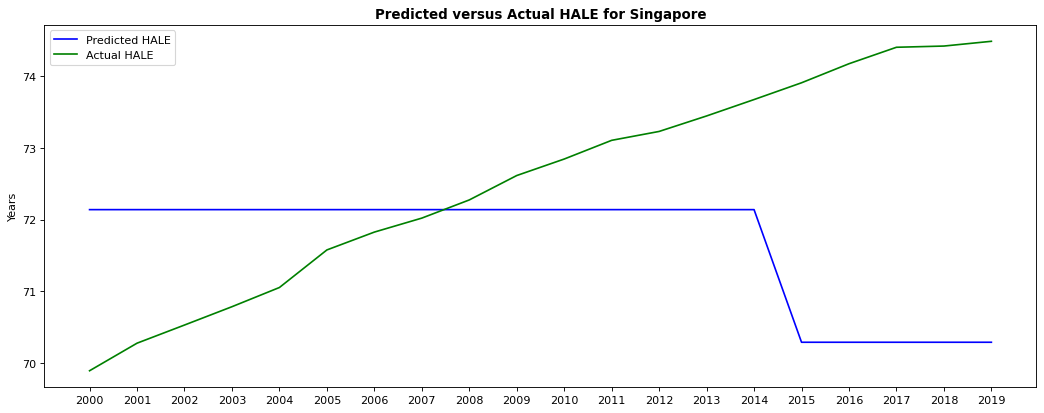

In [17]:
pred_HALE('Singapore', regtree_HALE)

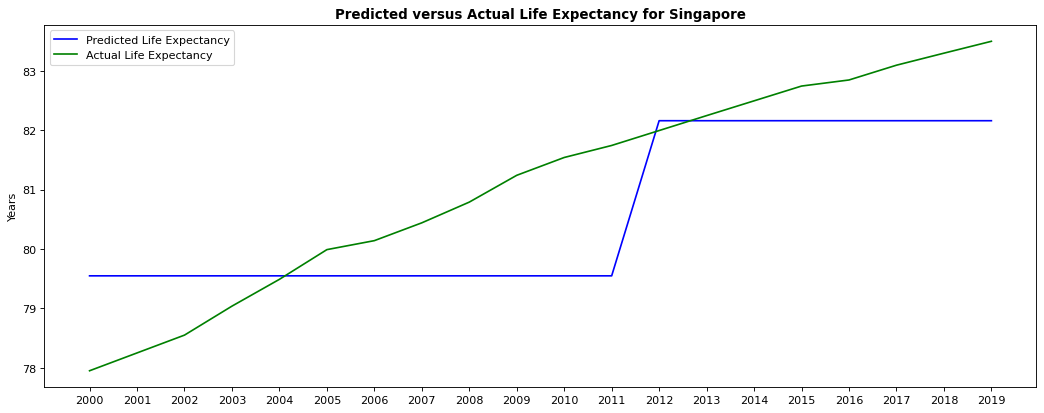

In [18]:
pred_LE('Singapore', regtree_LE)

Again, the model used to predict HALE does slightly better than the model used to predict life expectancy. 
Since this is true for both the linear regression and decision tree models, it suggests that our metrics are better at predicting HALE than life expectancy overall.

However, this model has one major issue; it is a lot less consistent compared to linear regression. 
The models are a lot less responsive to changes in predictor values as we can see in the graph. 


We suspect this issues arises due to the total number of predictors we are using for this model. 
Since, normal regression trees show promising results, we will go one step further and implement random forest model.

We expect random forest regression to have better accuracy since it is a collection of regression trees and can generalize the data more effectively. 

---

## Random Forest Regression 

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	 0.8899101461387791
Mean Squared Error (MSE) 	: 6.074237863776368
Root Mean Squared Error (RMSE) 	: 2.4645968968122083


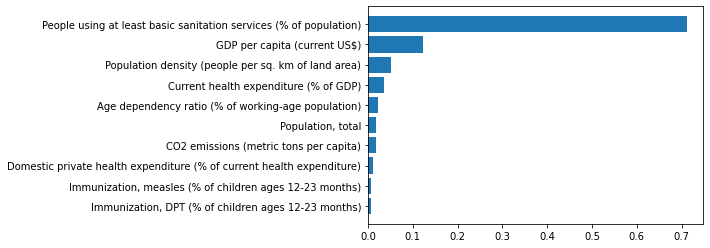

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor_HALE = RandomForestRegressor(n_estimators = 500, random_state = 0, ccp_alpha=0.01, max_depth=6)

#regression tree using training data
forest_regressor_HALE.fit(X_train_hale, y_train_hale.values.ravel())

# Predict HALE values in test set using different variables
pred = forest_regressor_HALE.predict(X_test_hale)  
mse = mean_sq_err(y_test_hale, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t", forest_regressor_HALE.score(X_test_hale, y_test_hale))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


sorted_list = forest_regressor_HALE.feature_importances_.argsort()
plt.barh(X_test_hale.columns[sorted_list], forest_regressor_HALE.feature_importances_[sorted_list])
plt.show()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	 0.927569627201393
Mean Squared Error (MSE) 	: 6.3115692469658855
Root Mean Squared Error (RMSE) 	: 2.5122836716752124


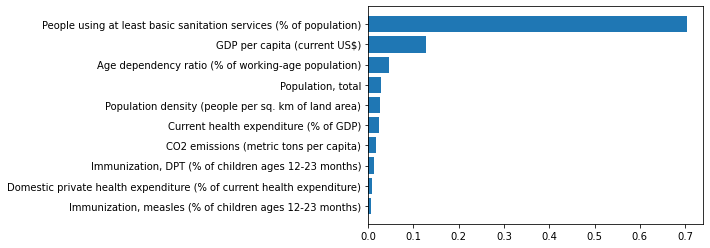

In [20]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor_LE = RandomForestRegressor(n_estimators = 500, random_state = 0, ccp_alpha=0.01, max_depth=6)

#regression tree using training data
forest_regressor_LE.fit(X_train_le, y_train_le.values.ravel())

# Predict LE values in test set using different variables
pred = forest_regressor_LE.predict(X_test_le)  
mse = mean_sq_err(y_test_le, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t", forest_regressor_LE.score(X_test_le, y_test_le))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


sorted_list = forest_regressor_LE.feature_importances_.argsort()
plt.barh(X_test_le.columns[sorted_list], forest_regressor_LE.feature_importances_[sorted_list])
plt.show()

This model is our best one yet. 
The models for HALE and LE have the highest R^2 score (~0.9).
Both models also have lower MSE and RMSE values than their linear regression and regression tree counterparts. 
This makes the random forest model the most effective model for predictng both life expectancy and HALE.

The rankings of the importances of the metrics have also changed for the less important metrics. Domestic private health expenditure is now again at the bottom of the rankings.



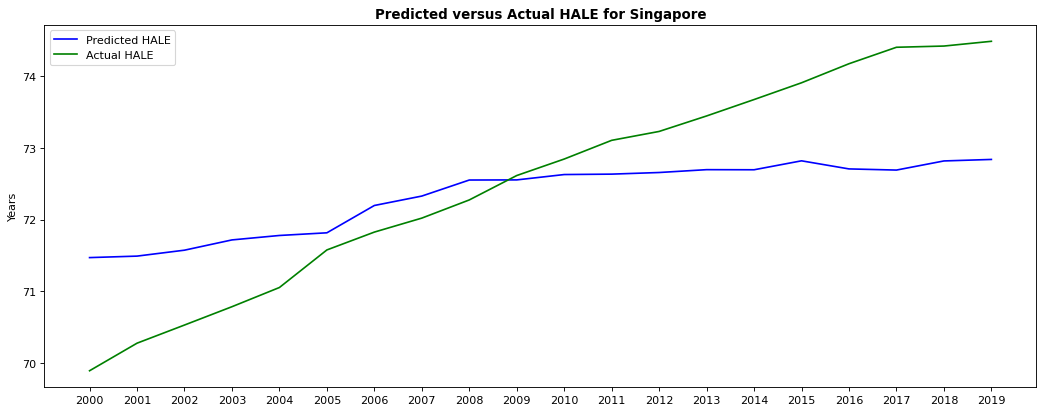

In [21]:
pred_HALE('Singapore', forest_regressor_HALE)

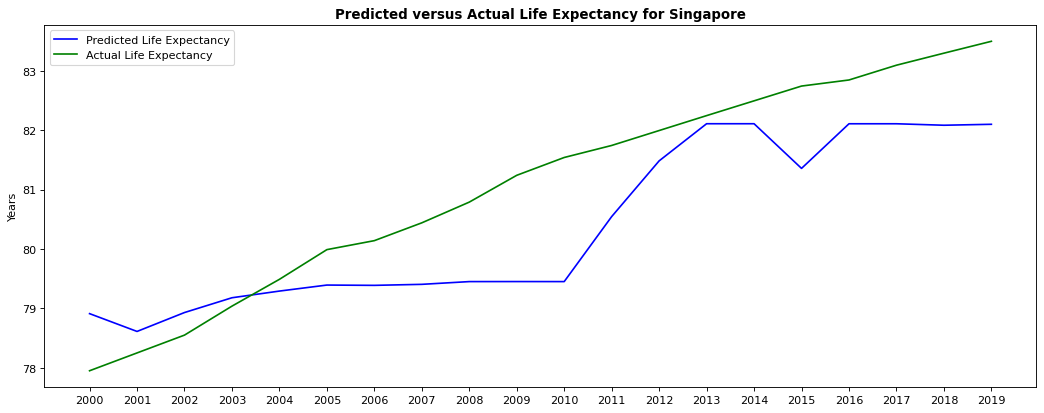

In [22]:
pred_LE('Singapore', forest_regressor_LE)

Clearly shown in the graph, this random forest model shows improvements over the original regression tree, having more accuracy as well as being more consistent in predictions. 


We can now use this model to predict the future trends for HALE and LE.